<a href="https://colab.research.google.com/github/blexiss/colab/blob/main/Project_2201010079_2201010080_2201010088_2201010119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import seaborn as sns
import itertools
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

In [2]:
df_read = pd.read_csv('combined_emotion_sampled_50000.csv')
df_read

,sentence,emotion
0,i told you i m feeling rebellious i argued smi...,anger
1,i feel you grumpy,anger
2,i did feel a little rushed for time,anger
3,i was free to be honest and not feel like some...,anger
4,i feel equally wronged,anger
...,...,...
49994,i feel this funny ache in my chest every sprin...,suprise
49995,i have just feel in love with these books i wa...,suprise
49996,i remember feeling dazed and sleepy and sittin...,suprise
49997,i feel weird talking about energies but i real...,suprise


In [3]:
df = pd.DataFrame(df_read[['sentence', 'emotion']])
df

,sentence,emotion
0,i told you i m feeling rebellious i argued smi...,anger
1,i feel you grumpy,anger
2,i did feel a little rushed for time,anger
3,i was free to be honest and not feel like some...,anger
4,i feel equally wronged,anger
...,...,...
49994,i feel this funny ache in my chest every sprin...,suprise
49995,i have just feel in love with these books i wa...,suprise
49996,i remember feeling dazed and sleepy and sittin...,suprise
49997,i feel weird talking about energies but i real...,suprise


In [4]:
df['emotion'].value_counts()

,count
emotion,
joy,16905
sad,14492
anger,6896
fear,5750
love,4146
suprise,1810


In [5]:
df = df.astype ({'emotion' : 'category'})
df = df.astype ({'sentence' : 'string'})
df.dtypes

,0
sentence,string[python]
emotion,category


In [6]:
df['emotion'] = df['emotion'].map({'joy': 0, 'sad': 1, 'anger': 2, 'fear': 3, 'love': 4, 'suprise': 5})
X = df['sentence']
y = df['emotion']
df

,sentence,emotion
0,i told you i m feeling rebellious i argued smi...,2
1,i feel you grumpy,2
2,i did feel a little rushed for time,2
3,i was free to be honest and not feel like some...,2
4,i feel equally wronged,2
...,...,...
49994,i feel this funny ache in my chest every sprin...,5
49995,i have just feel in love with these books i wa...,5
49996,i remember feeling dazed and sleepy and sittin...,5
49997,i feel weird talking about energies but i real...,5


<Axes: ylabel='count'>

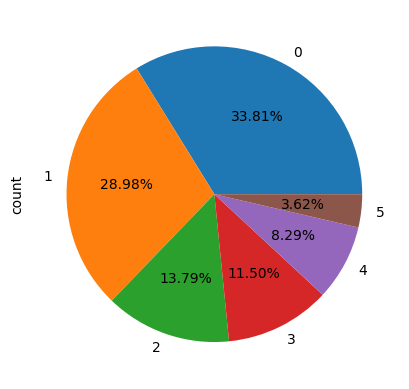

In [7]:
y.value_counts().plot.pie(autopct='%.2f%%')

      words  count
0         i  80857
1      feel  34749
2       and  29974
3        to  27700
4       the  26002
5         a  19547
6   feeling  16060
7        of  15656
8      that  15647
9        my  13226
10       in  10346
11       it   9906
12     like   8828
13       so   7784
14      for   7712


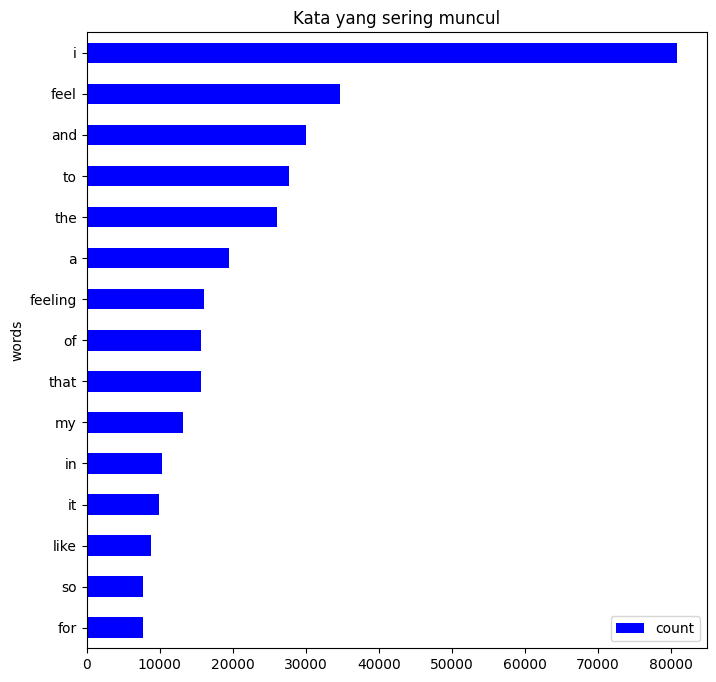

In [8]:
all_words = ' '.join([text for text in df['sentence']])

all_words = all_words.split()

# List of all words across tweets
all_words_no_urls = list(itertools.chain(all_words))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)


clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

print(clean_tweets_no_urls)

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Kata yang sering muncul")

plt.show()

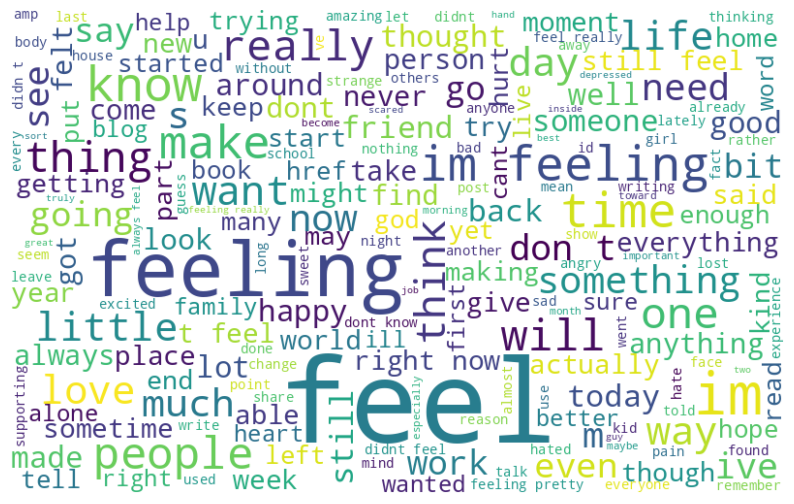

In [ ]:
def plot_wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')


all_words = ' '.join([text for text in df['sentence']])
plot_wordCloud(all_words)

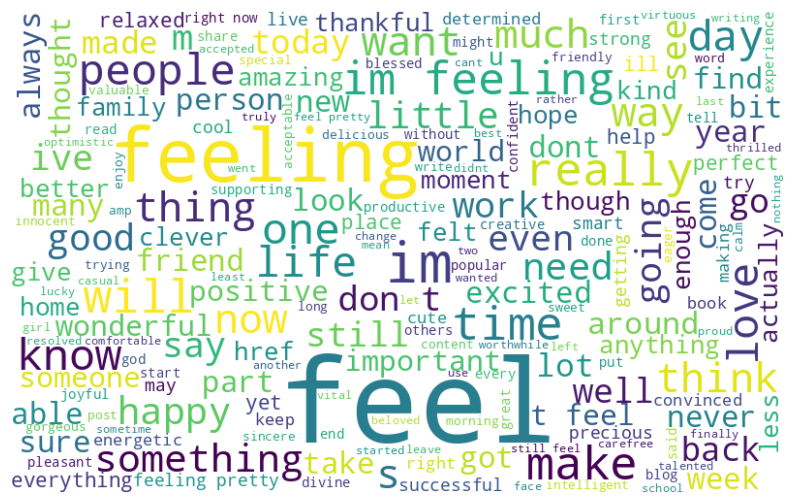

In [ ]:
joy_words = ' '.join(text for text in df['sentence'][df['emotion'] == 0])
plot_wordCloud(joy_words)

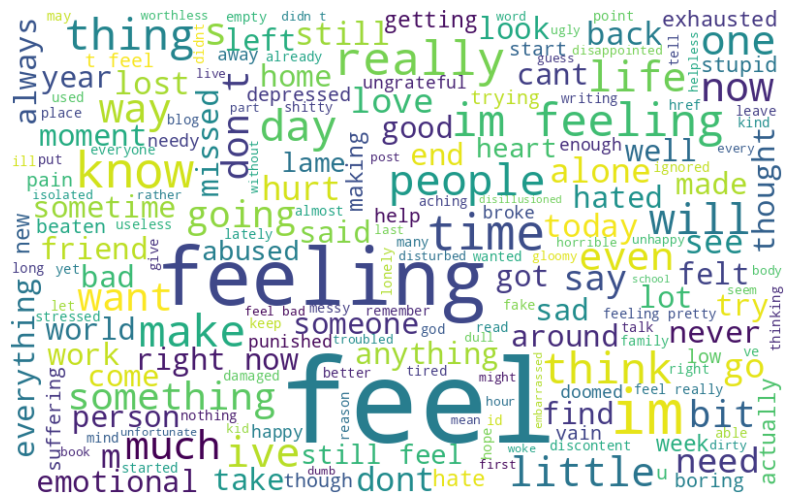

In [ ]:
sad_words = ' '.join(text for text in df['sentence'][df['emotion'] == 1])
plot_wordCloud(sad_words)

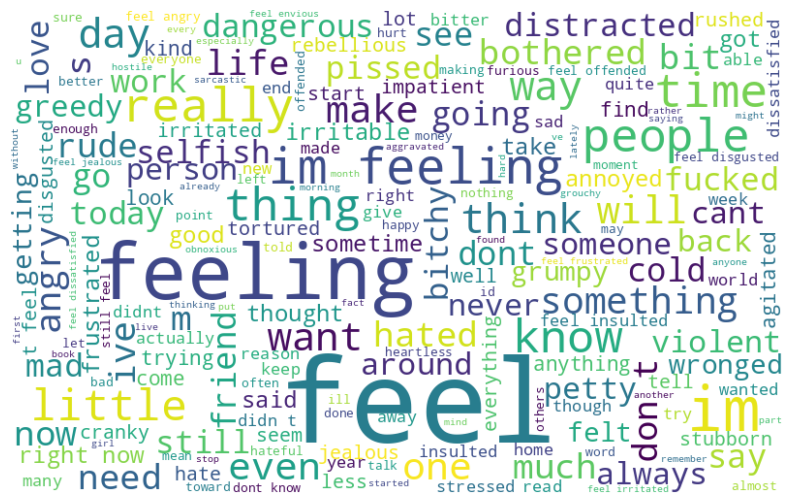

In [ ]:
anger_words = ' '.join(text for text in df['sentence'][df['emotion'] == 2])
plot_wordCloud(anger_words)

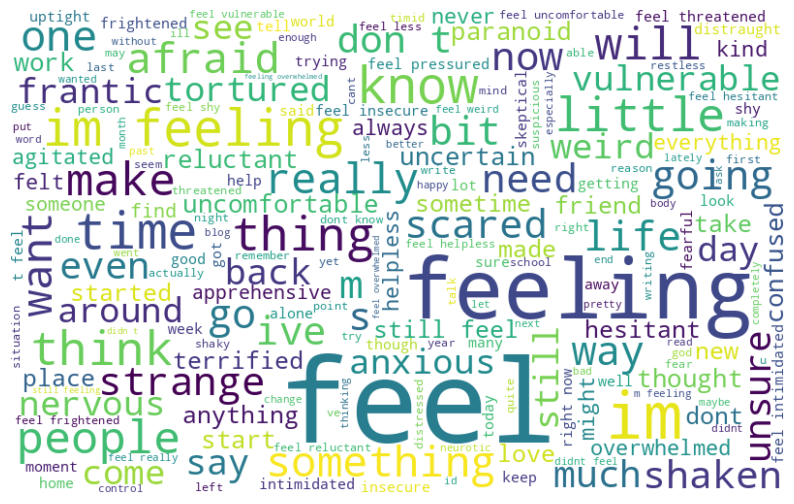

In [ ]:
fear_words = ' '.join(text for text in df['sentence'][df['emotion'] == 3])
plot_wordCloud(fear_words)

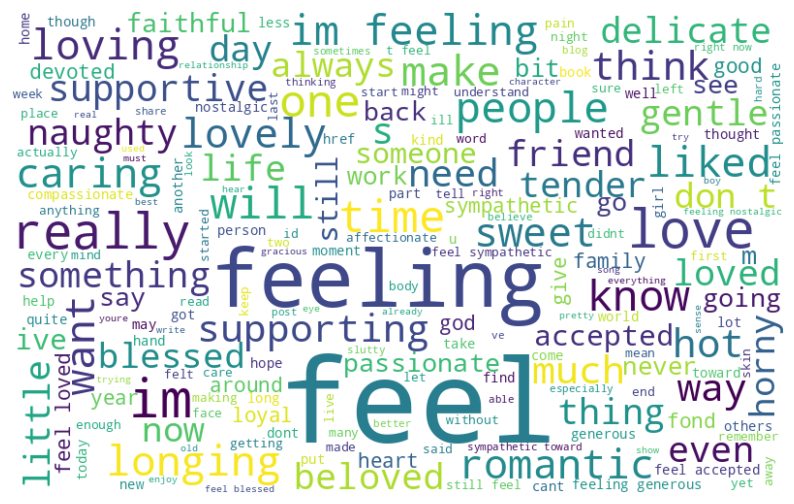

In [ ]:
love_words = ' '.join(text for text in df['sentence'][df['emotion'] == 4])
plot_wordCloud(love_words)

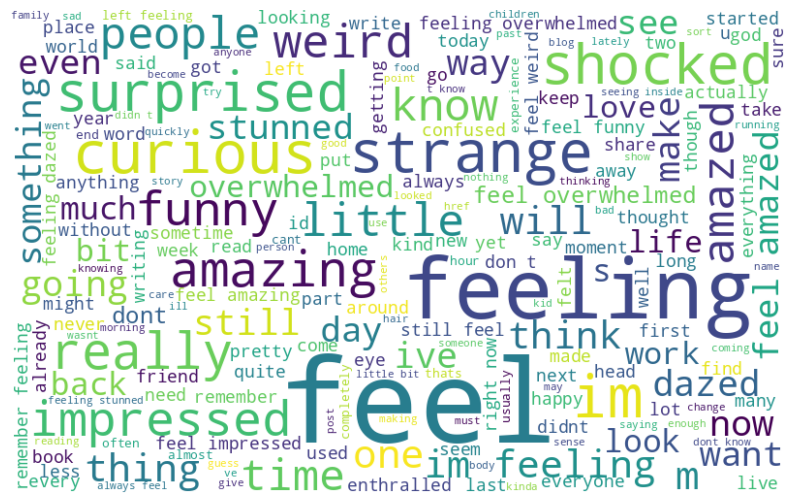

In [ ]:
suprise_words = ' '.join(text for text in df['sentence'][df['emotion'] == 5])
plot_wordCloud(suprise_words)

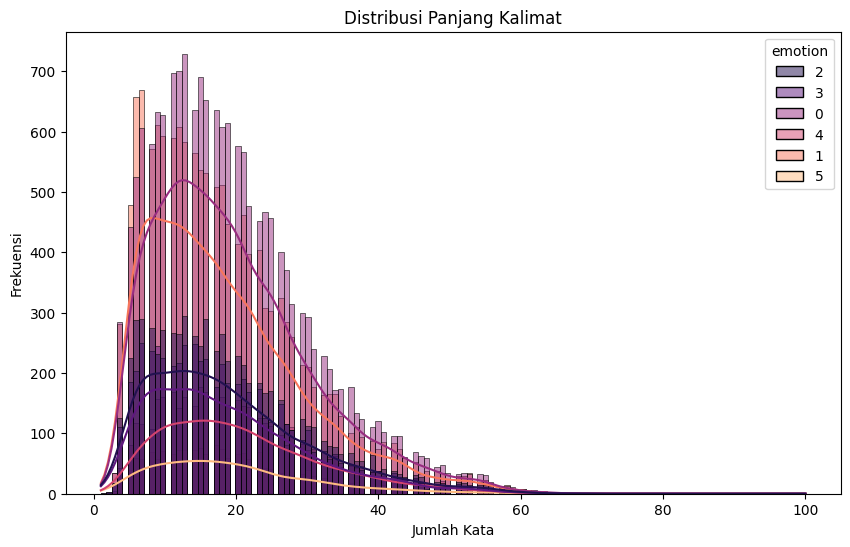

In [ ]:
# Asumsikan df sudah berisi data dengan kolom 'cleaned_sentence' dan 'emotion'
df['sentence_length'] = df['sentence'].apply(lambda x: len(x.split()))

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sentence_length', hue='emotion', kde=True, palette='magma')
plt.title('Distribusi Panjang Kalimat')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

/tmp/ipython-input-26-625720268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=df, palette='viridis')


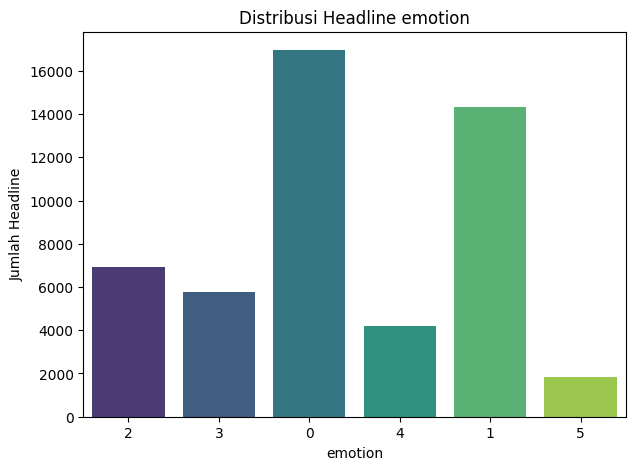

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='emotion', data=df, palette='viridis')
plt.title('Distribusi Headline emotion')
plt.xlabel('emotion')
plt.ylabel('Jumlah Headline')
plt.show()

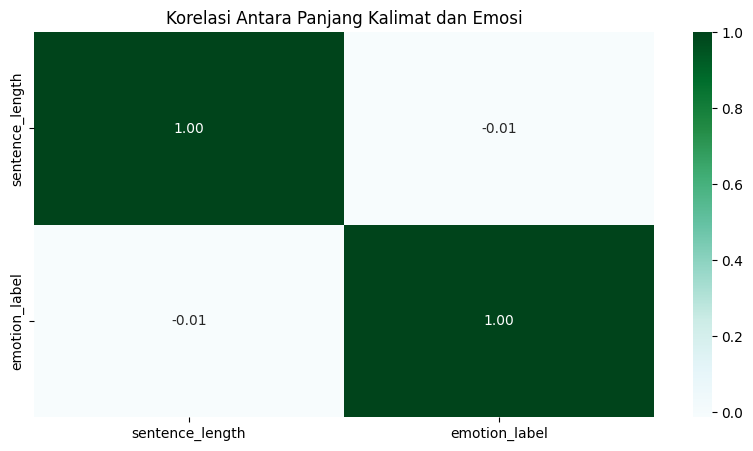

In [ ]:
# df sudah memiliki kolom 'sentence_length' dan 'emotion'
# Ubah emosi ke bentuk angka agar bisa dihitung korelasinya
df['emotion_label'] = df['emotion'].astype('category').cat.codes

# Buat DataFrame numerik
x = df[['sentence_length', 'emotion_label']]

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(x.corr(), annot=True, fmt='.2f', cmap='BuGn')
plt.title('Korelasi Antara Panjang Kalimat dan Emosi')
plt.show()

In [ ]:
#instantiate CountVectorizer()
cv=CountVectorizer()

# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(X)
print(word_count_vector.shape)

tokens = cv.get_feature_names_out()
print(tokens)

(50000, 27247)
['aa' 'aaa' 'aaaaaand' ... 'zumba' 'zweig' 'zzzz']


In [ ]:
print(df['sentence_length'].apply(type).value_counts())

sentence_length
<class 'int'>    50000
Name: count, dtype: int64


In [ ]:
# Ganti yang bukan string jadi string kosong
df['sentence_length_str'] = df['sentence_length'].apply(lambda x: x if isinstance(x, str) else '')

In [ ]:
X = df['sentence']  # Setelah dibersihkan

cv = CountVectorizer()
word_count_vector = cv.fit_transform(x)
tokens = cv.get_feature_names_out()

print("Jumlah dokumen:", word_count_vector.shape[0])
print("Jumlah fitur unik:", word_count_vector.shape[1])
print("Contoh kata:", tokens[:10])

Jumlah dokumen: 2
Jumlah fitur unik: 2
Contoh kata: ['emotion_label' 'sentence_length']


In [ ]:
vectorizer = TfidfVectorizer()
data = vectorizer.fit_transform(X)

In [ ]:
print(data)
print(data.shape)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 781822 stored elements and shape (50000, 27247)>
  Coords	Values
  (0, 19296)	0.41898100265417826
  (0, 6814)	0.41184687111629953
  (0, 8646)	0.1535172794986899
  (0, 1703)	0.6007747233418596
  (0, 9154)	0.3242383550367765
  (0, 27116)	0.4064587801714859
  (1, 8646)	0.11639912935988722
  (1, 3819)	0.32251462808916637
  (1, 12518)	0.1827158163029688
  (1, 19033)	0.21464957954946756
  (1, 606)	0.4066592902171575
  (1, 24091)	0.1669254641094732
  (1, 6532)	0.45825474001416594
  (1, 24578)	0.28633124432219714
  (1, 17262)	0.24589589068359474
  (1, 24083)	0.097201524434903
  (1, 10619)	0.32406897575646715
  (1, 2098)	0.25216558595382277
  (1, 11619)	0.12537201659110295
  (1, 19271)	0.2520276115372316
  (2, 8646)	0.05003327705384535
  (2, 24091)	0.07175163627992866
  (2, 25856)	0.14038738598580372
  (2, 18704)	0.22357250304317344
  (2, 11866)	0.2926143879169721
  :	:
  (49998, 8646)	0.0848396703631613
  (49998, 24410)	0.1153180382

In [ ]:
X= data
y= df['emotion']

In [ ]:
#X1, Y1= X,Y
#Y = Y1.values
sm = SMOTE(random_state=5)
X_Smote, Y_Smote = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(Y_Smote))

Resampled dataset shape Counter({1: 16958, 0: 16958, 3: 16958, 2: 16958, 4: 16958, 5: 16958})


In [ ]:
# Split 80% data training dan 20% data testing
X_train, X_test, y_train, y_test = train_test_split(
    X_Smote, Y_Smote, test_size=0.2, random_state=42, stratify=Y_Smote
)

In [ ]:
print(X_train.shape)
print(X_test.shape)


(81398, 27247)
(20350, 27247)


In [ ]:
model = SVC(kernel="rbf", C=5)

model.fit(X_train,y_train)
prediksi = model.predict(X_test)

In [ ]:
print ("Accuracy RBF: ", accuracy_score(y_test, prediksi) *100, '%')
print ("Confusion Matrix RBF:")
print (confusion_matrix(y_test, prediksi))
print (classification_report (y_test, prediksi))
print ("\n")

Accuracy RBF:  96.00982800982801 %
Confusion Matrix RBF:
[[3154   56   20   28  110   23]
 [  73 3207   58   34   11    8]
 [  45   54 3258   28    5    2]
 [  33   18   14 3304    2   21]
 [ 137    9    3    0 3242    1]
 [   9    3    0    7    0 3373]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3391
           1       0.96      0.95      0.95      3391
           2       0.97      0.96      0.97      3392
           3       0.97      0.97      0.97      3392
           4       0.96      0.96      0.96      3392
           5       0.98      0.99      0.99      3392

    accuracy                           0.96     20350
   macro avg       0.96      0.96      0.96     20350
weighted avg       0.96      0.96      0.96     20350





In [ ]:
# Hapus URL, angka, dan simbol asing
def remove(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text.strip()

# Hapus tanda baca (jika masih ada)
def remove_punct(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [ ]:
# Preprocessing and vectorizer for testing models
def preprocess_data(text):

    text = remove(text)

    text = remove_punct(text)

    text = vectorizer.transform([text]).toarray()

    return text

In [ ]:
review = "i hate you "

In [ ]:
hasilnya = model.predict(preprocess_data(review))

In [ ]:
if hasilnya == 0 :
    print("joy")
elif hasilnya == 1 :
    print("sad")
elif hasilnya == 2 :
    print("anger")
elif hasilnya == 3 :
    print("fear")
elif hasilnya == 4 :
    print("love")
elif hasilnya == 5 :
    print("suprise")

anger
